# LAB 6

## Spectrum Analysis for Vowel Sounds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import spectrogram

# Load audio file
file_path = r"C:\Users\DHANALAKSHMI\OneDrive\Desktop\SPECH AI\LAB6\SPEECH1_5_2.wav"
sampling_rate, signal = wavfile.read(file_path)

# Split the audio file into two halves
midpoint = len(signal) // 2
vowel_signal = signal[:midpoint]
consonant_signal = signal[midpoint:]



In [7]:
# Function to plot spectrum
def plot_spectrum(signal, sampling_rate, title):
    n = len(signal)
    T = 1 / sampling_rate
    x = np.linspace(0.0, n*T, n, endpoint=False)
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    
    plt.figure(figsize=(8, 4))
    plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()


def plot_spectrogram(signal, sampling_rate, title):
    f, t, Sxx = spectrogram(signal, fs=sampling_rate)
    plt.figure(figsize=(8, 4))
    plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower', extent=[0, len(signal) / sampling_rate, 0, sampling_rate / 2])
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity [dB]')
    plt.show()


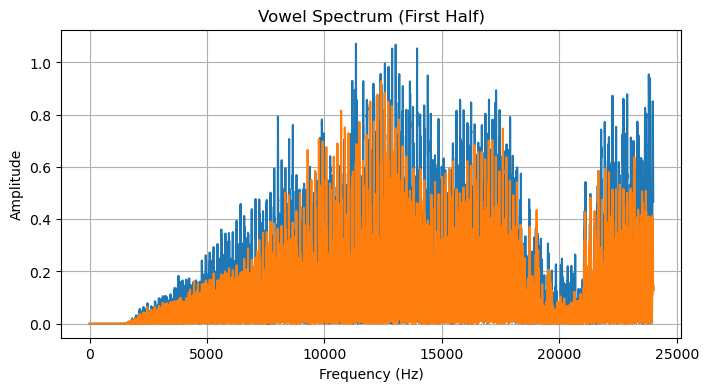

In [8]:
# Perform spectrum analysis for vowel (first half)
plot_spectrum(vowel_signal, sampling_rate, "Vowel Spectrum (First Half)")



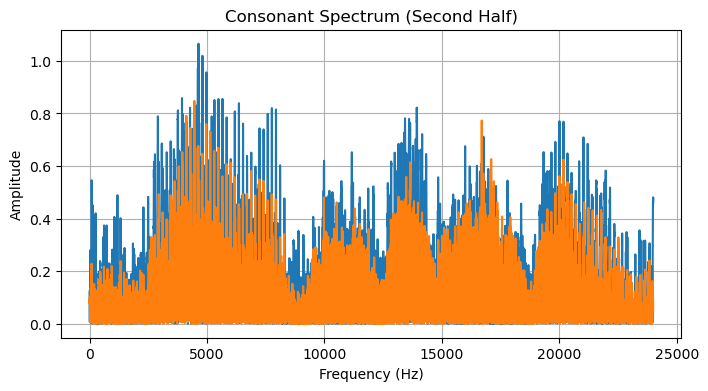

In [9]:
# Perform spectrum analysis for consonant (second half)
plot_spectrum(consonant_signal, sampling_rate, "Consonant Spectrum (Second Half)")



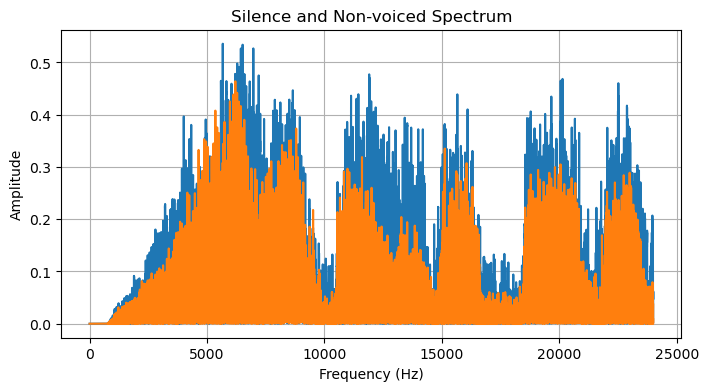

In [10]:
# Perform spectrum analysis for silence and non-voiced portions
plot_spectrum(signal, sampling_rate, "Silence and Non-voiced Spectrum")



C:\Users\DHANALAKSHMI\AppData\Local\Temp\ipykernel_14280\776588699.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower', extent=[0, len(signal) / sampling_rate, 0, sampling_rate / 2])


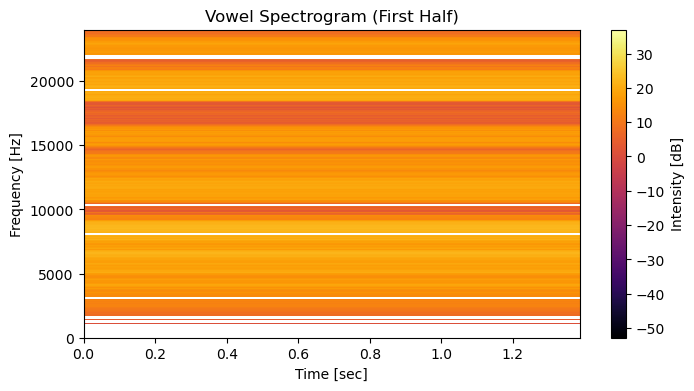

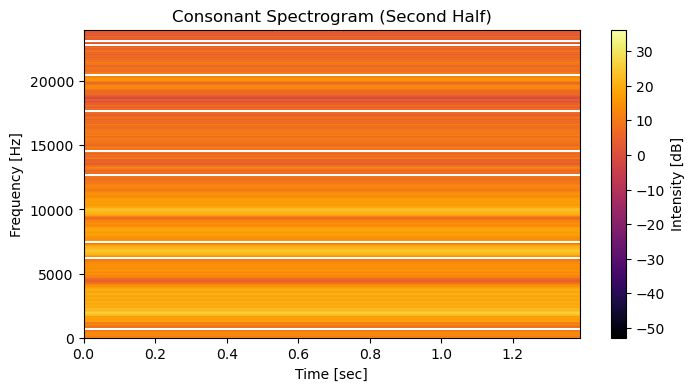

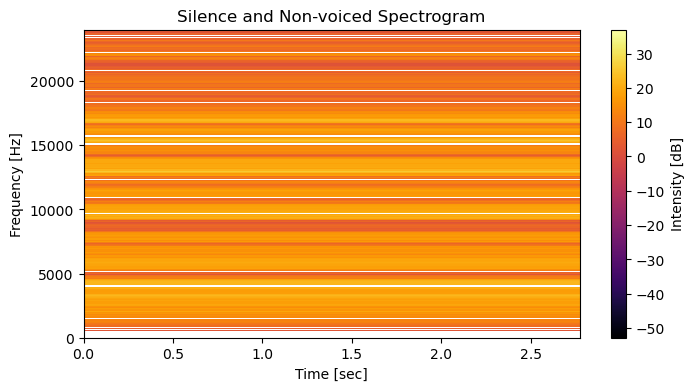

In [11]:
# Generate spectrograms for all segments
plot_spectrogram(vowel_signal, sampling_rate, "Vowel Spectrogram (First Half)")
plot_spectrogram(consonant_signal, sampling_rate, "Consonant Spectrogram (Second Half)")
plot_spectrogram(signal, sampling_rate, "Silence and Non-voiced Spectrogram")


In [ ]:

# Function to plot spectrogram
def plot_spectrogram(signal, sampling_rate, title):
    f, t, Sxx = spectrogram(signal, fs=sampling_rate)
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity [dB]')
    plt.show()

